In [1]:
import numpy as np
import pandas as pd
import requests
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt
import re
import seaborn as sns

In [2]:
url = "https://stats.espncricinfo.com/ci/engine/player/253802.html?class=11;template=results;type=batting;view=innings"
page = requests.get(url)
page

<Response [200]>

In [3]:
soup = BeautifulSoup(page.text)
data = soup.find_all('table',class_='engineTable')[3].text.split('\n')
rows = data[22:]

In [4]:
runs = []
for i in range(0,len(rows)-1,16):
    runs.append(rows[i])

mins = []
for i in range(1,len(rows),16):
    mins.append(rows[i])

bf = []
for i in range(2,len(rows),16):
    bf.append(rows[i])    
    
fours = []
for i in range(3,len(rows),16):
    fours.append(rows[i])    
    
sixes = []
for i in range(4,len(rows),16):
    sixes.append(rows[i])    
    
sr = []
for i in range(5,len(rows),16):
    sr.append(rows[i])    
    
pos = []
for i in range(6,len(rows),16):
    pos.append(rows[i])    
    
dismissal = []
for i in range(7,len(rows),16):
    dismissal.append(rows[i])
    
    
inns = []
for i in range(8,len(rows),16):
    inns.append(rows[i])    
        

In [5]:
Ground = []
for i in range(11,len(rows),16):
    Ground.append(rows[i])
Date = []
for i in range(12,len(rows),16):
    Date.append(rows[i])

In [8]:
opposition = []
for i in range(10,len(rows),16):
    opposition.append(rows[i])
print(opposition)

['ODI v Sri Lanka', 'ODI v Sri Lanka', 'ODI v Sri Lanka', 'ODI v Sri Lanka', 'ODI v Sri Lanka', 'ODI v Sri Lanka', 'ODI v Pakistan', 'ODI v Australia', 'ODI v West Indies', 'ODI v Australia', 'ODI v Australia', 'ODI v Sri Lanka', 'ODI v Sri Lanka', 'ODI v Sri Lanka', 'ODI v Sri Lanka', 'ODI v Sri Lanka', 'ODI v Bangladesh', 'ODI v Sri Lanka', 'ODI v Bangladesh', 'ODI v Sri Lanka', 'ODI v South Africa', 'ODI v South Africa', 'ODI v South Africa', 'ODI v Zimbabwe', 'ODI v Sri Lanka', 'ODI v Zimbabwe', 'ODI v Sri Lanka', 'T20I v Zimbabwe', 'T20I v Zimbabwe', 'ODI v Bangladesh', 'ODI v Pakistan', 'ODI v Sri Lanka', 'ODI v Sri Lanka', 'ODI v Sri Lanka', 'ODI v New Zealand', 'ODI v Sri Lanka', 'ODI v Australia', 'ODI v New Zealand', 'ODI v New Zealand', 'ODI v New Zealand', 'ODI v New Zealand', 'ODI v New Zealand', 'T20I v South Africa', 'ODI v South Africa', 'ODI v South Africa', 'ODI v South Africa', 'ODI v South Africa', 'ODI v South Africa', 'ODI v Bangladesh', 'ODI v England', 'ODI v Ir

In [9]:
df = pd.DataFrame({"Runs":runs,
                  "Mins":mins,
                  "BF":bf, # Balls faced
                  "Fours":fours,
                  "Sixes":sixes,
                  "SR":sr, # Strike Rate
                  "POS":pos,
                  "Dismissal":dismissal,
                  "INNS":inns,
                  "Opposition":opposition,
                  "Ground":Ground,
                  "Date":Date})
df

,Runs,Mins,BF,Fours,Sixes,SR,POS,Dismissal,INNS,Opposition,Ground,Date
0,12,33,22,1,0,54.54,2,lbw,1,ODI v Sri Lanka,Dambulla,18 Aug 2008
1,37,82,67,6,0,55.22,2,caught,2,ODI v Sri Lanka,Dambulla,20 Aug 2008
2,25,40,38,4,0,65.78,1,run out,1,ODI v Sri Lanka,Colombo (RPS),24 Aug 2008
3,54,87,66,7,0,81.81,1,bowled,1,ODI v Sri Lanka,Colombo (RPS),27 Aug 2008
4,31,45,46,3,1,67.39,1,lbw,2,ODI v Sri Lanka,Colombo (RPS),29 Aug 2008
...,...,...,...,...,...,...,...,...,...,...,...,...
601,54,99,63,4,0,85.71,3,bowled,1,ODI v Australia,Ahmedabad,19 Nov 2023
602,38,96,64,5,0,59.37,4,caught,1,Test v South Africa,Centurion,26 Dec 2023
603,76,137,82,12,1,92.68,4,caught,3,Test v South Africa,Centurion,26 Dec 2023
604,46,103,59,6,1,77.96,4,caught,2,Test v South Africa,Cape Town,3 Jan 2024


In [14]:
df[['Format', 'Opposition']] = df['Opposition'].str.split('v', expand=True)

ValueError: Columns must be same length as key

In [12]:
df

,Runs,Mins,BF,Fours,Sixes,SR,POS,Dismissal,INNS,Opposition,Ground,Date,Format
0,12,33,22,1,0,54.54,2,lbw,1,Sri Lanka,Dambulla,18 Aug 2008,ODI
1,37,82,67,6,0,55.22,2,caught,2,Sri Lanka,Dambulla,20 Aug 2008,ODI
2,25,40,38,4,0,65.78,1,run out,1,Sri Lanka,Colombo (RPS),24 Aug 2008,ODI
3,54,87,66,7,0,81.81,1,bowled,1,Sri Lanka,Colombo (RPS),27 Aug 2008,ODI
4,31,45,46,3,1,67.39,1,lbw,2,Sri Lanka,Colombo (RPS),29 Aug 2008,ODI
...,...,...,...,...,...,...,...,...,...,...,...,...,...
601,54,99,63,4,0,85.71,3,bowled,1,Australia,Ahmedabad,19 Nov 2023,ODI
602,38,96,64,5,0,59.37,4,caught,1,South Africa,Centurion,26 Dec 2023,Test
603,76,137,82,12,1,92.68,4,caught,3,South Africa,Centurion,26 Dec 2023,Test
604,46,103,59,6,1,77.96,4,caught,2,South Africa,Cape Town,3 Jan 2024,Test


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 606 entries, 0 to 605
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Runs        606 non-null    object
 1   Mins        606 non-null    object
 2   BF          606 non-null    object
 3   Fours       606 non-null    object
 4   Sixes       606 non-null    object
 5   SR          606 non-null    object
 6   POS         606 non-null    object
 7   Dismissal   606 non-null    object
 8   INNS        606 non-null    object
 9   Opposition  606 non-null    object
 10  Ground      606 non-null    object
 11  Date        606 non-null    object
dtypes: object(12)
memory usage: 56.9+ KB


In [8]:

# df['Mins'] = pd.to_numeric(df['Mins'], errors='coerce').astype('Int64')
# df['BF'] = pd.to_numeric(df['BF'], errors='coerce').astype('Int64')
# df['Fours'] = pd.to_numeric(df['Fours'], errors='coerce').astype('Int64')
# df['Sixes'] = pd.to_numeric(df['Sixes'], errors='coerce').astype('Int64')
# df['POS'] = pd.to_numeric(df['POS'], errors='coerce').astype('Int64')
# df['INNS'] = pd.to_numeric(df['INNS'], errors='coerce').astype('Int64')

In [15]:
# Columns to convert
columns_to_convert = ['Mins','BF', 'Fours', 'Sixes', 'POS', 'INNS']

# Apply conversion in a loop
for col in columns_to_convert:
    df[col] = pd.to_numeric(df[col], errors='coerce').astype('Int64')

    
df['SR'] = pd.to_numeric(df['SR'], errors='coerce').astype('Float64')
df['Date'] = pd.to_datetime(df['Date'])

In [16]:
df

,Runs,Mins,BF,Fours,Sixes,SR,POS,Dismissal,INNS,Opposition,Ground,Date,Format
0,12,33,22,1,0,54.54,2,lbw,1,Sri Lanka,Dambulla,2008-08-18,ODI
1,37,82,67,6,0,55.22,2,caught,2,Sri Lanka,Dambulla,2008-08-20,ODI
2,25,40,38,4,0,65.78,1,run out,1,Sri Lanka,Colombo (RPS),2008-08-24,ODI
3,54,87,66,7,0,81.81,1,bowled,1,Sri Lanka,Colombo (RPS),2008-08-27,ODI
4,31,45,46,3,1,67.39,1,lbw,2,Sri Lanka,Colombo (RPS),2008-08-29,ODI
...,...,...,...,...,...,...,...,...,...,...,...,...,...
601,54,99,63,4,0,85.71,3,bowled,1,Australia,Ahmedabad,2023-11-19,ODI
602,38,96,64,5,0,59.37,4,caught,1,South Africa,Centurion,2023-12-26,Test
603,76,137,82,12,1,92.68,4,caught,3,South Africa,Centurion,2023-12-26,Test
604,46,103,59,6,1,77.96,4,caught,2,South Africa,Cape Town,2024-01-03,Test


In [11]:
# # Define a dictionary to map old values to new values
# replacement_dict = {'Sri': 'Sri Lanka', 'New': 'New Zealand', 'South':'South Africa', 'West': 'West Indies', 'Hong': 'Hong Kong'}

# # Replace values in the 'Status' column using the replace method
# df['Opposition'] = df['Opposition'].replace(replacement_dict)


In [17]:
df.head(10)

,Runs,Mins,BF,Fours,Sixes,SR,POS,Dismissal,INNS,Opposition,Ground,Date,Format
0,12,33,22,1,0,54.54,2,lbw,1,Sri Lanka,Dambulla,2008-08-18,ODI
1,37,82,67,6,0,55.22,2,caught,2,Sri Lanka,Dambulla,2008-08-20,ODI
2,25,40,38,4,0,65.78,1,run out,1,Sri Lanka,Colombo (RPS),2008-08-24,ODI
3,54,87,66,7,0,81.81,1,bowled,1,Sri Lanka,Colombo (RPS),2008-08-27,ODI
4,31,45,46,3,1,67.39,1,lbw,2,Sri Lanka,Colombo (RPS),2008-08-29,ODI
5,2*,6,2,0,0,100.0,7,not out,1,Sri Lanka,Colombo (RPS),2009-09-14,ODI
6,16,28,24,1,0,66.66,4,caught,2,Pakistan,Centurion,2009-09-26,ODI
7,TDNB,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,-,<NA>,Australia,Centurion,2009-09-28,ODI
8,79*,121,104,9,2,75.96,4,not out,2,West Indies,Johannesburg,2009-09-30,ODI
9,30,53,41,3,0,73.17,4,caught,2,Australia,Vadodara,2009-10-25,ODI


In [18]:
df.Opposition.value_counts()

Opposition
 Australia       116
 England         108
 West Indies      82
 Sri Lanka        79
 South Africa     73
 New Zealand      62
 Bangladesh       30
 Pakistan         26
 Zimbabwe         11
 Afghanistan       6
 Ireland           4
 Netherlands       3
 U.A.E.            2
 Scotland          1
 Namibia           1
 Hong Kong         1
 Nepal             1
Name: count, dtype: int64

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 606 entries, 0 to 605
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Runs        606 non-null    object        
 1   Mins        511 non-null    Int64         
 2   BF          578 non-null    Int64         
 3   Fours       578 non-null    Int64         
 4   Sixes       578 non-null    Int64         
 5   SR          577 non-null    Float64       
 6   POS         578 non-null    Int64         
 7   Dismissal   606 non-null    object        
 8   INNS        599 non-null    Int64         
 9   Opposition  606 non-null    object        
 10  Ground      606 non-null    object        
 11  Date        606 non-null    datetime64[ns]
 12  Format      606 non-null    object        
dtypes: Float64(1), Int64(6), datetime64[ns](1), object(5)
memory usage: 65.8+ KB


In [20]:
df.Dismissal.value_counts()

Dismissal
caught        348
not out        86
lbw            58
bowled         56
-              28
run out        21
stumped         7
hit wicket      2
Name: count, dtype: int64

In [16]:
# z = df.iloc[:,:5]

In [21]:
df['Dismissal'] = df['Dismissal'].replace('-','not played')

In [22]:
df.Dismissal.value_counts()

Dismissal
caught        348
not out        86
lbw            58
bowled         56
not played     28
run out        21
stumped         7
hit wicket      2
Name: count, dtype: int64

In [23]:
df.Runs = df.Runs.str.replace('*',"")
df.Runs.head(20)

0       12
1       37
2       25
3       54
4       31
5        2
6       16
7     TDNB
8       79
9       30
10      10
11      27
12      54
13     107
14    TDNB
15       9
16      91
17      71
18     102
19       2
Name: Runs, dtype: object

In [24]:
df.Runs = pd.to_numeric(df.Runs, errors='coerce').astype('Int64')

In [25]:
df.head(10)

,Runs,Mins,BF,Fours,Sixes,SR,POS,Dismissal,INNS,Opposition,Ground,Date,Format
0,12,33,22,1,0,54.54,2,lbw,1,Sri Lanka,Dambulla,2008-08-18,ODI
1,37,82,67,6,0,55.22,2,caught,2,Sri Lanka,Dambulla,2008-08-20,ODI
2,25,40,38,4,0,65.78,1,run out,1,Sri Lanka,Colombo (RPS),2008-08-24,ODI
3,54,87,66,7,0,81.81,1,bowled,1,Sri Lanka,Colombo (RPS),2008-08-27,ODI
4,31,45,46,3,1,67.39,1,lbw,2,Sri Lanka,Colombo (RPS),2008-08-29,ODI
5,2,6,2,0,0,100.0,7,not out,1,Sri Lanka,Colombo (RPS),2009-09-14,ODI
6,16,28,24,1,0,66.66,4,caught,2,Pakistan,Centurion,2009-09-26,ODI
7,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,not played,<NA>,Australia,Centurion,2009-09-28,ODI
8,79,121,104,9,2,75.96,4,not out,2,West Indies,Johannesburg,2009-09-30,ODI
9,30,53,41,3,0,73.17,4,caught,2,Australia,Vadodara,2009-10-25,ODI


In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 606 entries, 0 to 605
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Runs        578 non-null    Int64         
 1   Mins        511 non-null    Int64         
 2   BF          578 non-null    Int64         
 3   Fours       578 non-null    Int64         
 4   Sixes       578 non-null    Int64         
 5   SR          577 non-null    Float64       
 6   POS         578 non-null    Int64         
 7   Dismissal   606 non-null    object        
 8   INNS        599 non-null    Int64         
 9   Opposition  606 non-null    object        
 10  Ground      606 non-null    object        
 11  Date        606 non-null    datetime64[ns]
 12  Format      606 non-null    object        
dtypes: Float64(1), Int64(7), datetime64[ns](1), object(4)
memory usage: 66.4+ KB


In [27]:
df.Dismissal = df.Dismissal.str.title()
df

,Runs,Mins,BF,Fours,Sixes,SR,POS,Dismissal,INNS,Opposition,Ground,Date,Format
0,12,33,22,1,0,54.54,2,Lbw,1,Sri Lanka,Dambulla,2008-08-18,ODI
1,37,82,67,6,0,55.22,2,Caught,2,Sri Lanka,Dambulla,2008-08-20,ODI
2,25,40,38,4,0,65.78,1,Run Out,1,Sri Lanka,Colombo (RPS),2008-08-24,ODI
3,54,87,66,7,0,81.81,1,Bowled,1,Sri Lanka,Colombo (RPS),2008-08-27,ODI
4,31,45,46,3,1,67.39,1,Lbw,2,Sri Lanka,Colombo (RPS),2008-08-29,ODI
...,...,...,...,...,...,...,...,...,...,...,...,...,...
601,54,99,63,4,0,85.71,3,Bowled,1,Australia,Ahmedabad,2023-11-19,ODI
602,38,96,64,5,0,59.37,4,Caught,1,South Africa,Centurion,2023-12-26,Test
603,76,137,82,12,1,92.68,4,Caught,3,South Africa,Centurion,2023-12-26,Test
604,46,103,59,6,1,77.96,4,Caught,2,South Africa,Cape Town,2024-01-03,Test


In [28]:
df.Dismissal.value_counts()

Dismissal
Caught        348
Not Out        86
Lbw            58
Bowled         56
Not Played     28
Run Out        21
Stumped         7
Hit Wicket      2
Name: count, dtype: int64

([<matplotlib.patches.Wedge at 0x182f30a8110>,
 [Text(-0.2542939801204336, 1.070203051609604, '348'),
  Text(-0.6730255761442511, -0.8700784871812997, '86'),
  Text(0.09681812234293641, -1.0957309209774033, '58'),
  Text(0.6909220905824778, -0.8559361335667157, '56'),
  Text(0.987503969248509, -0.4845987110160736, '28'),
  Text(1.0775938889079195, -0.22088777826830244, '21'),
  Text(1.0982119287846872, -0.06269417417126813, '7'),
  Text(1.099940874739221, -0.01140491463877916, '2')],
 [Text(-0.1387058073384183, 0.5837471190597839, '57.4%'),
  Text(-0.367104859715046, -0.4745882657352543, '14.2%'),
  Text(0.05280988491432894, -0.5976714114422199, '9.6%'),
  Text(0.3768665948631697, -0.46687425467275395, '9.2%'),
  Text(0.5386385286810048, -0.264326569645131, '4.6%'),
  Text(0.5877784848588651, -0.12048424269180132, '3.5%'),
  Text(0.5990246884280112, -0.034196822275237154, '1.2%'),
  Text(0.5999677498577568, -0.006220862530243177, '0.3%')])

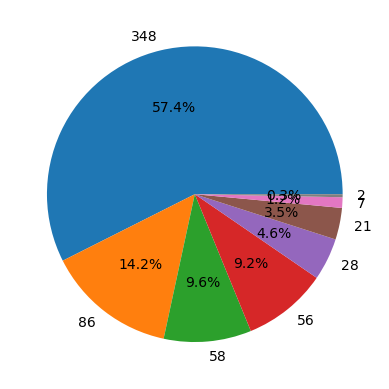

In [29]:
dis = df.Dismissal.value_counts()
plt.pie(dis, autopct='%1.1f%%',labels=dis)

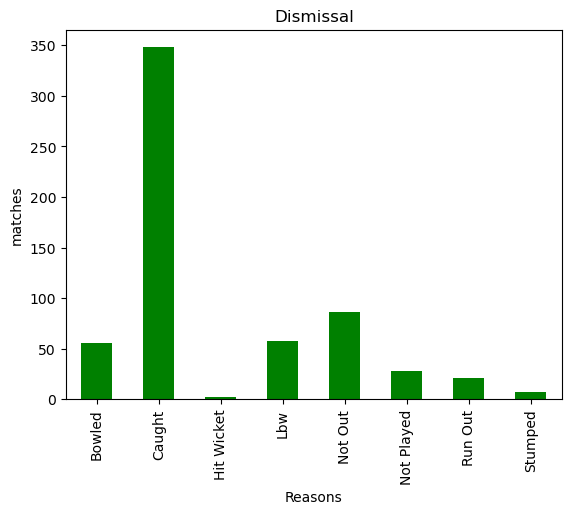

In [30]:
# Plotting the bar chart
df['Dismissal'].value_counts().sort_index().plot.bar(color='green')
plt.title('Dismissal')
plt.xlabel('Reasons')
plt.ylabel('matches')
plt.show()

In [31]:
bowled = df.loc[df['Dismissal']=='Bowled']

In [32]:
bowled

,Runs,Mins,BF,Fours,Sixes,SR,POS,Dismissal,INNS,Opposition,Ground,Date,Format
3,54,87,66,7,0,81.81,1,Bowled,1,Sri Lanka,Colombo (RPS),2008-08-27,ODI
11,27,20,19,4,0,142.1,7,Bowled,1,Sri Lanka,Rajkot,2009-12-15,ODI
30,18,31,27,1,0,66.66,3,Bowled,2,Pakistan,Dambulla,2010-06-19,ODI
42,28,28,19,5,0,147.36,1,Bowled,1,South Africa,Durban,2011-01-09,T20I
49,8,12,5,1,0,160.0,7,Bowled,1,England,Bengaluru,2011-02-27,ODI
51,12,16,20,2,0,60.0,5,Bowled,2,Netherlands,Delhi,2011-03-09,ODI
53,59,128,76,5,0,77.63,3,Bowled,1,West Indies,Chennai,2011-03-20,ODI
70,55,92,73,4,0,75.34,4,Bowled,1,England,Chester-le-Street,2011-09-03,ODI
79,0,5,5,0,0,0.0,3,Bowled,1,England,Eden Gardens,2011-10-25,ODI
83,3,13,6,0,0,50.0,4,Bowled,2,West Indies,Cuttack,2011-11-29,ODI


In [33]:
df.groupby(by = ['Dismissal'])[['Opposition']].sum().idxmax()

Opposition    Run Out
dtype: object

In [34]:
df.groupby(by = ['Dismissal','Ground'])[['Opposition']]

In [35]:
data_1 = df.groupby(by = ['Ground','Dismissal'])[['Opposition']].count()
data_1.head(50)

Opposition
Ground     Dismissal             
Abu Dhabi  Not Played           1
Adelaide   Caught               9
           Lbw                  2
           Not Out              2
           Run Out              2
Ahmedabad  Bowled               3
           Caught              10
           Lbw                  1
           Not Out              4
           Not Played           1
           Run Out              1
           Stumped              1
Auckland   Bowled               2
           Caught               5
Bengaluru  Bowled               5
           Caught               3
           Lbw                  5
           Not Out              2
           Not Played           1
           Run Out              3
Birmingham Bowled               1
           Caught               7
           Lbw                  1
           Not Out              4
Brabourne  Caught               1
Bridgetown Caught               2
           Not Played           1
Brisbane   Bowled               1
           Caught               5
           Run Out              1
Bristol    Caught               1
Bulawayo   Caught               1
           Not Played           2
           Run Out              1
Canberra   Caught               3
Cape Town  Caught               7
           Lbw                  1
           Not Out              1
Cardiff    Caught               3
           Hit Wicket           1
           Not Out              1
Centurion  Caught               8
           Lbw                  1
           Not Out              2
           Not Played           2
Chattogram Caught               1
           Lbw                  1
           Not Out              1
Chennai    Bowled               5
           Caught              10

In [36]:
df.to_csv('Cricket_DataAnalysis')

In [37]:
df.isna().sum()

Runs          28
Mins          95
BF            28
Fours         28
Sixes         28
SR            29
POS           28
Dismissal      0
INNS           7
Opposition     0
Ground         0
Date           0
Format         0
dtype: int64

In [34]:
df.head(50)

,Runs,Mins,BF,Fours,Sixes,SR,POS,Dismissal,INNS,Opposition,Ground,Date
0,12,33,22,1,0,54.54,2,Lbw,1,Sri Lanka,Dambulla,2008-08-18
1,37,82,67,6,0,55.22,2,Caught,2,Sri Lanka,Dambulla,2008-08-20
2,25,40,38,4,0,65.78,1,Run Out,1,Sri Lanka,Colombo (RPS),2008-08-24
3,54,87,66,7,0,81.81,1,Bowled,1,Sri Lanka,Colombo (RPS),2008-08-27
4,31,45,46,3,1,67.39,1,Lbw,2,Sri Lanka,Colombo (RPS),2008-08-29
5,2,6,2,0,0,100.0,7,Not Out,1,Sri Lanka,Colombo (RPS),2009-09-14
6,16,28,24,1,0,66.66,4,Caught,2,Pakistan,Centurion,2009-09-26
7,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,Not Played,<NA>,Australia,Centurion,2009-09-28
8,79,121,104,9,2,75.96,4,Not Out,2,West Indies,Johannesburg,2009-09-30
9,30,53,41,3,0,73.17,4,Caught,2,Australia,Vadodara,2009-10-25


In [38]:
# Iterate through the 'SR' column and set values to 0 if corresponding 'Runs' is 0
for index, sr_value in df['SR'].items():
    if pd.notna(df['Runs'][index]) and df['Runs'][index] == 0:
        df.at[index, 'SR'] = 0

In [39]:
df.head(50)

,Runs,Mins,BF,Fours,Sixes,SR,POS,Dismissal,INNS,Opposition,Ground,Date,Format
0,12,33,22,1,0,54.54,2,Lbw,1,Sri Lanka,Dambulla,2008-08-18,ODI
1,37,82,67,6,0,55.22,2,Caught,2,Sri Lanka,Dambulla,2008-08-20,ODI
2,25,40,38,4,0,65.78,1,Run Out,1,Sri Lanka,Colombo (RPS),2008-08-24,ODI
3,54,87,66,7,0,81.81,1,Bowled,1,Sri Lanka,Colombo (RPS),2008-08-27,ODI
4,31,45,46,3,1,67.39,1,Lbw,2,Sri Lanka,Colombo (RPS),2008-08-29,ODI
5,2,6,2,0,0,100.0,7,Not Out,1,Sri Lanka,Colombo (RPS),2009-09-14,ODI
6,16,28,24,1,0,66.66,4,Caught,2,Pakistan,Centurion,2009-09-26,ODI
7,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,Not Played,<NA>,Australia,Centurion,2009-09-28,ODI
8,79,121,104,9,2,75.96,4,Not Out,2,West Indies,Johannesburg,2009-09-30,ODI
9,30,53,41,3,0,73.17,4,Caught,2,Australia,Vadodara,2009-10-25,ODI


In [40]:
df.isna().sum()

Runs          28
Mins          95
BF            28
Fours         28
Sixes         28
SR            28
POS           28
Dismissal      0
INNS           7
Opposition     0
Ground         0
Date           0
Format         0
dtype: int64

In [41]:
df.Runs.mean()

46.200692041522494

In [42]:
df.Runs.median()

33.5

In [43]:
df.Runs.mode()

0    0
Name: Runs, dtype: Int64

In [44]:
zeros = df[df.Runs==0]

In [45]:
zeros.Opposition.value_counts()

Opposition
 England         11
 Australia        6
 West Indies      5
 Sri Lanka        4
 New Zealand      2
 South Africa     2
 Zimbabwe         1
 Pakistan         1
 Ireland          1
 Bangladesh       1
Name: count, dtype: int64

In [46]:
print(df['Runs'].isna().sum())  # Check for NaN values

28


In [47]:
dfc = df.dropna(subset=['Runs'])

# Display the cleaned DataFrame
dfc.head(50)

,Runs,Mins,BF,Fours,Sixes,SR,POS,Dismissal,INNS,Opposition,Ground,Date,Format
0,12,33,22,1,0,54.54,2,Lbw,1,Sri Lanka,Dambulla,2008-08-18,ODI
1,37,82,67,6,0,55.22,2,Caught,2,Sri Lanka,Dambulla,2008-08-20,ODI
2,25,40,38,4,0,65.78,1,Run Out,1,Sri Lanka,Colombo (RPS),2008-08-24,ODI
3,54,87,66,7,0,81.81,1,Bowled,1,Sri Lanka,Colombo (RPS),2008-08-27,ODI
4,31,45,46,3,1,67.39,1,Lbw,2,Sri Lanka,Colombo (RPS),2008-08-29,ODI
5,2,6,2,0,0,100.0,7,Not Out,1,Sri Lanka,Colombo (RPS),2009-09-14,ODI
6,16,28,24,1,0,66.66,4,Caught,2,Pakistan,Centurion,2009-09-26,ODI
8,79,121,104,9,2,75.96,4,Not Out,2,West Indies,Johannesburg,2009-09-30,ODI
9,30,53,41,3,0,73.17,4,Caught,2,Australia,Vadodara,2009-10-25,ODI
10,10,32,16,1,0,62.5,3,Caught,2,Australia,Mohali,2009-11-02,ODI


In [48]:
dfc.Runs.sum()

26704

In [49]:
dfc.describe()

,Runs,Mins,BF,Fours,Sixes,SR,POS,INNS,Date
count,578.0,511.0,578.0,578.0,578.0,578.0,578.0,578.0,578
mean,46.200692,83.272016,58.176471,4.569204,0.508651,77.714983,3.522491,1.747405,2016-09-22 04:06:38.615916800
min,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,2008-08-18 00:00:00
25%,11.0,21.0,17.0,1.0,0.0,48.5175,3.0,1.0,2013-06-07 06:00:00
50%,33.5,62.0,41.0,3.0,0.0,73.22,3.0,2.0,2016-10-24 12:00:00
75%,70.75,120.0,83.0,7.0,1.0,102.8625,4.0,2.0,2019-10-02 00:00:00
max,254.0,536.0,366.0,33.0,8.0,241.37,7.0,4.0,2024-01-03 00:00:00
std,44.495725,84.300434,58.214687,4.875172,1.056839,44.177826,0.847269,0.812725,NaN


In [50]:
df.Runs.mean() == dfc.Runs.mean()

True

In [51]:
df.describe()

,Runs,Mins,BF,Fours,Sixes,SR,POS,INNS,Date
count,578.0,511.0,578.0,578.0,578.0,578.0,578.0,599.0,606
mean,46.200692,83.272016,58.176471,4.569204,0.508651,77.714983,3.522491,1.771285,2016-09-23 02:20:11.881188352
min,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,2008-08-18 00:00:00
25%,11.0,21.0,17.0,1.0,0.0,48.5175,3.0,1.0,2013-06-07 06:00:00
50%,33.5,62.0,41.0,3.0,0.0,73.22,3.0,2.0,2016-10-18 00:00:00
75%,70.75,120.0,83.0,7.0,1.0,102.8625,4.0,2.0,2019-10-16 18:00:00
max,254.0,536.0,366.0,33.0,8.0,241.37,7.0,4.0,2024-01-03 00:00:00
std,44.495725,84.300434,58.214687,4.875172,1.056839,44.177826,0.847269,0.827684,NaN


In [52]:
dfc.isna().sum()

Runs           0
Mins          67
BF             0
Fours          0
Sixes          0
SR             0
POS            0
Dismissal      0
INNS           0
Opposition     0
Ground         0
Date           0
Format         0
dtype: int64

In [53]:
dfc.Mins = df['Mins'].fillna(62)
dfc.head(20)

C:\Users\MUJAHID\AppData\Local\Temp\ipykernel_15772\1584495358.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfc.Mins = df['Mins'].fillna(62)


,Runs,Mins,BF,Fours,Sixes,SR,POS,Dismissal,INNS,Opposition,Ground,Date,Format
0,12,33,22,1,0,54.54,2,Lbw,1,Sri Lanka,Dambulla,2008-08-18,ODI
1,37,82,67,6,0,55.22,2,Caught,2,Sri Lanka,Dambulla,2008-08-20,ODI
2,25,40,38,4,0,65.78,1,Run Out,1,Sri Lanka,Colombo (RPS),2008-08-24,ODI
3,54,87,66,7,0,81.81,1,Bowled,1,Sri Lanka,Colombo (RPS),2008-08-27,ODI
4,31,45,46,3,1,67.39,1,Lbw,2,Sri Lanka,Colombo (RPS),2008-08-29,ODI
5,2,6,2,0,0,100.0,7,Not Out,1,Sri Lanka,Colombo (RPS),2009-09-14,ODI
6,16,28,24,1,0,66.66,4,Caught,2,Pakistan,Centurion,2009-09-26,ODI
8,79,121,104,9,2,75.96,4,Not Out,2,West Indies,Johannesburg,2009-09-30,ODI
9,30,53,41,3,0,73.17,4,Caught,2,Australia,Vadodara,2009-10-25,ODI
10,10,32,16,1,0,62.5,3,Caught,2,Australia,Mohali,2009-11-02,ODI


In [54]:
dfc.isna().sum()

Runs          0
Mins          0
BF            0
Fours         0
Sixes         0
SR            0
POS           0
Dismissal     0
INNS          0
Opposition    0
Ground        0
Date          0
Format        0
dtype: int64

In [55]:
dfc.describe()

,Runs,Mins,BF,Fours,Sixes,SR,POS,INNS,Date
count,578.0,578.0,578.0,578.0,578.0,578.0,578.0,578.0,578
mean,46.200692,80.806228,58.176471,4.569204,0.508651,77.714983,3.522491,1.747405,2016-09-22 04:06:38.615916800
min,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,2008-08-18 00:00:00
25%,11.0,26.0,17.0,1.0,0.0,48.5175,3.0,1.0,2013-06-07 06:00:00
50%,33.5,62.0,41.0,3.0,0.0,73.22,3.0,2.0,2016-10-24 12:00:00
75%,70.75,110.75,83.0,7.0,1.0,102.8625,4.0,2.0,2019-10-02 00:00:00
max,254.0,536.0,366.0,33.0,8.0,241.37,7.0,4.0,2024-01-03 00:00:00
std,44.495725,79.547576,58.214687,4.875172,1.056839,44.177826,0.847269,0.812725,NaN


In [56]:
df.describe()

,Runs,Mins,BF,Fours,Sixes,SR,POS,INNS,Date
count,578.0,511.0,578.0,578.0,578.0,578.0,578.0,599.0,606
mean,46.200692,83.272016,58.176471,4.569204,0.508651,77.714983,3.522491,1.771285,2016-09-23 02:20:11.881188352
min,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,2008-08-18 00:00:00
25%,11.0,21.0,17.0,1.0,0.0,48.5175,3.0,1.0,2013-06-07 06:00:00
50%,33.5,62.0,41.0,3.0,0.0,73.22,3.0,2.0,2016-10-18 00:00:00
75%,70.75,120.0,83.0,7.0,1.0,102.8625,4.0,2.0,2019-10-16 18:00:00
max,254.0,536.0,366.0,33.0,8.0,241.37,7.0,4.0,2024-01-03 00:00:00
std,44.495725,84.300434,58.214687,4.875172,1.056839,44.177826,0.847269,0.827684,NaN


In [57]:
dfc.to_excel("output.xlsx",index=False)

In [61]:
centuries = dfc[dfc.Runs >= 100]
centuries

,Runs,Mins,BF,Fours,Sixes,SR,POS,Dismissal,INNS,Opposition,Ground,Date,Format
13,107,62,114,11,1,93.85,4,Caught,2,Sri Lanka,Eden Gardens,2009-12-24,ODI
18,102,128,95,11,0,107.36,3,Not Out,2,Bangladesh,Mirpur,2010-01-11,ODI
36,118,193,121,11,1,97.52,3,Caught,2,Australia,Visakhapatnam,2010-10-20,ODI
37,105,162,104,10,0,100.96,3,Caught,1,New Zealand,Guwahati,2010-11-28,ODI
48,100,113,83,8,2,120.48,4,Not Out,1,Bangladesh,Mirpur,2011-02-19,ODI
...,...,...,...,...,...,...,...,...,...,...,...,...,...
582,121,272,206,11,0,58.73,4,Run Out,1,West Indies,Port of Spain,2023-07-20,Test
587,122,147,94,9,3,129.78,3,Not Out,1,Pakistan,Colombo (RPS),2023-09-10,ODI
594,103,113,97,6,4,106.18,3,Not Out,2,Bangladesh,Pune,2023-10-19,ODI
598,101,195,121,10,0,83.47,3,Not Out,1,South Africa,Eden Gardens,2023-11-05,ODI


In [70]:
centuries.Format.value_counts()

Format
ODI      50
Test     29
T20I      1
Name: count, dtype: int64

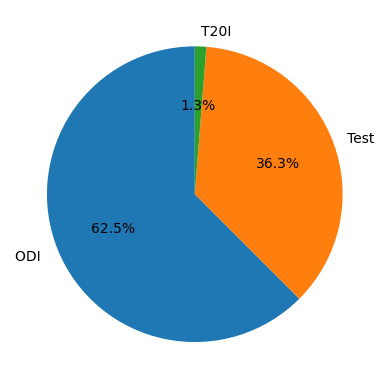

In [72]:
cf = centuries.Format.value_counts()
# plt.figure(figsize=(6,6))
plt.pie(cf,labels=cf.index,autopct='%1.1f%%',startangle=90)
plt.show()

In [74]:
ct = centuries.Opposition.value_counts()
ct

Opposition
 Australia       16
 Sri Lanka       15
 West Indies     12
 New Zealand      9
 England          8
 South Africa     8
 Bangladesh       7
 Pakistan         3
 Zimbabwe         1
 Afghanistan      1
Name: count, dtype: int64

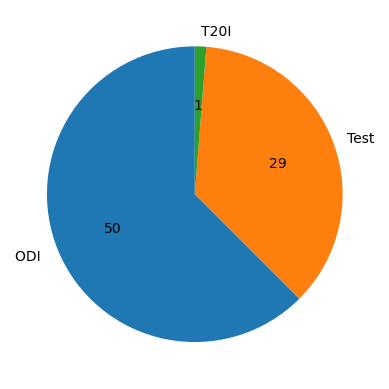

In [73]:
plt.pie(cf, labels=cf.index, startangle=90, autopct=lambda p: '{:.0f}'.format(p * sum(cf) / 100))
plt.show()

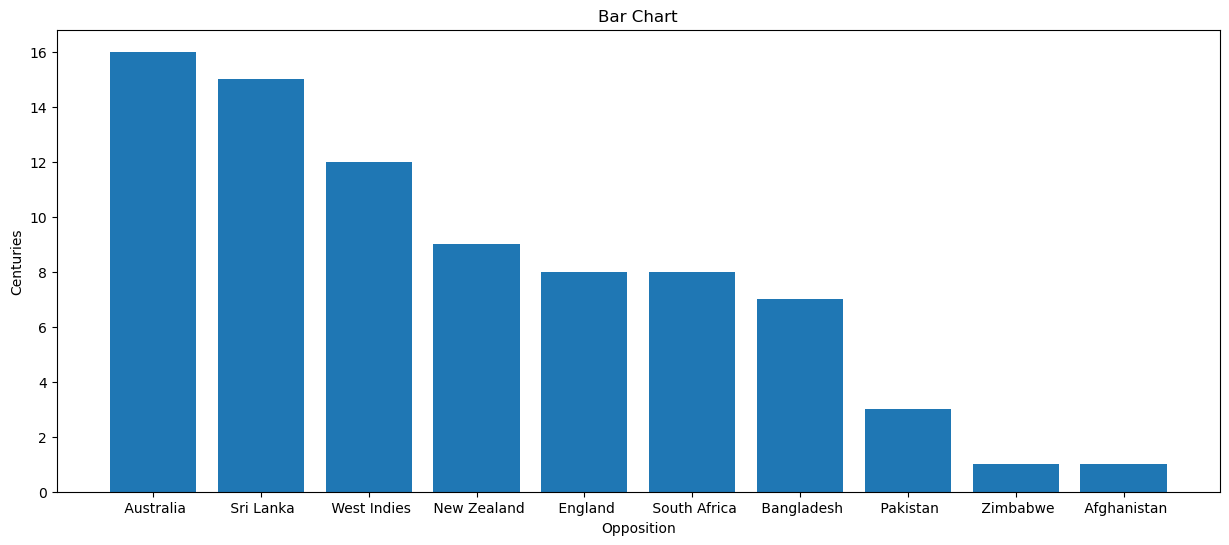

In [86]:
plt.figure(figsize=(15,6))
# Create a bar chart
plt.bar(ct.index, ct)

# Add labels and title
plt.xlabel('Opposition')
plt.ylabel('Centuries')
plt.title('Bar Chart')

# Show the bar chart
plt.show()